In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
######
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier 

In [2]:
data = {
    "Age" : [29, 45, 50, 39, 48, 50, 55, 60, 62, 43],
    "Cholesterol" : [220, 250, 230, 180, 240, 290, 310, 275, 300, 280],
    "Max_Heart_Rate" : [180, 165, 170, 190, 155, 160, 150, 140, 130, 148],
    "Heart_Disease" : [0, 1, 1, 0, 1, 1, 1, 1, 1, 0]
}

In [3]:
df = pd.DataFrame(data)
df.head()

,Age,Cholesterol,Max_Heart_Rate,Heart_Disease
0,29,220,180,0
1,45,250,165,1
2,50,230,170,1
3,39,180,190,0
4,48,240,155,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             10 non-null     int64
 1   Cholesterol     10 non-null     int64
 2   Max_Heart_Rate  10 non-null     int64
 3   Heart_Disease   10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes


In [5]:
df.isna().sum()

Age               0
Cholesterol       0
Max_Heart_Rate    0
Heart_Disease     0
dtype: int64

In [6]:
df.shape

(10, 4)

In [7]:
X = df.drop(["Heart_Disease"], axis = 1)
y = df["Heart_Disease"]

In [8]:
X.shape

(10, 3)

In [9]:
y.shape

(10,)

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state=0)

In [11]:
model = RandomForestClassifier()
model.fit(X_train , y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy_score = accuracy_score(y_test , y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
classification_report = classification_report(y_test,y_pred)

In [14]:
print(f"accuracy_score : {accuracy_score}")
print(f"confusion_matrix : \n{confusion_matrix}")
print(f"classification_report : \n{classification_report}")

accuracy_score : 1.0
confusion_matrix : 
[[2]]
classification_report : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Feature Importances:
                Importance
Age               0.415979
Max_Heart_Rate    0.317372
Cholesterol       0.266649


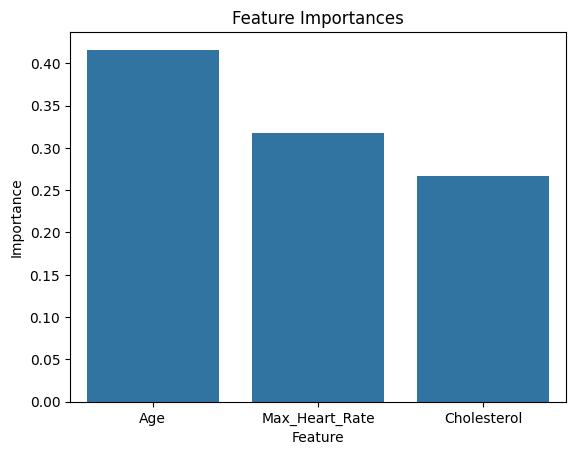

In [15]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print(f"Feature Importances:\n{feature_importances}")

# Plotting the feature importances
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()